In [1]:
import pandas as pd
import bibtex_tools as bt
import community
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [2]:
b3_refs = bt.ref_dict.load('b3_refs.pickle')

In [3]:
print(b3_refs.__repr__()[:500])

{'Cao et al 2020': [{'author': 'Abdulla, H and Ketzenberg, M and Abbey, J', 'title': 'Taking stock of consumer returns: a review and classification of the literature', 'journal': 'Journal of Operations Management', 'year': '2019', 'pages': '560--605', 'volume': '65', 'author_list': [('Abdulla', 'H'), ('Ketzenberg', 'M'), ('Abbey', 'J')], 'nickname': 'abdulla2019taking', 'source': 'batch3'}, {'author': 'Altug, M and Aydinliyim, T', 'title': "Counteracting strategic purchase deferrals: the impact 


In [4]:
bcgraph = b3_refs.to_bib_coupling_graph()


In [5]:
partition = community.best_partition(bcgraph)
community.modularity(partition,bcgraph)

0.18137773871109766

In [6]:
Counter(partition.values())

Counter({2: 14, 1: 23, 3: 10, 0: 11})

In [7]:
partition1 = community.best_partition(bcgraph,weight='')
community.modularity(partition1,bcgraph)

0.12833845955021703

In [8]:
bcgraph2 = b3_refs.to_bib_coupling_graph()
c = 0
for u,v,data in bcgraph.edges.data():
    if data['weight'] < 5:
        c += 1
        bcgraph2.remove_edge(u,v)
print(c)

504


In [9]:
partition2 = community.best_partition(bcgraph2,random_state=1106)
community.modularity(partition2,bcgraph2),max(partition2.values())

(0.2839288268282585, 19)

In [10]:
Counter(partition2.values()).most_common()

[(0, 20),
 (8, 12),
 (14, 7),
 (4, 2),
 (10, 2),
 (1, 1),
 (3, 1),
 (5, 1),
 (6, 1),
 (9, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (2, 1),
 (7, 1)]

In [11]:
partit2_sizes = Counter(partition2.values())

In [12]:
bcgraph3 = bcgraph2.copy()
d= 0

for u in bcgraph2.nodes():
    if partit2_sizes[partition2[u]] <= 2:
        bcgraph3.remove_node(u)
        d+=1
print(d)

19


In [13]:
len(list(bcgraph2.nodes())),len(list(bcgraph3.nodes())),

(58, 39)

In [14]:
bcgraph3.nodes().get('De Giovanni 2020')

In [15]:
partition3 = community.best_partition(bcgraph3,random_state=1106)
print(community.modularity(partition3,bcgraph3),max(partition3.values()))
print(community.modularity(partition2,bcgraph3),max(partition3.values()))
partition3 = {k: v for k, v in partition2.items() if k in bcgraph3.nodes()}

0.27825731595793324 2
0.2768710943453742 2


In [19]:
pos3 = nx.drawing.layout.kamada_kawai_layout(bcgraph3)
offset = { 0: np.array([0.5, 0.5]) , 14: np.zeros(2), 8: np.zeros(2) }
pos3 = {k: v + offset[partition3[k]] for k,v in pos3.items()}

In [18]:
Counter(partition3.values())

Counter({0: 20, 14: 7, 8: 12})

In [ ]:
Counter(partition3.values())

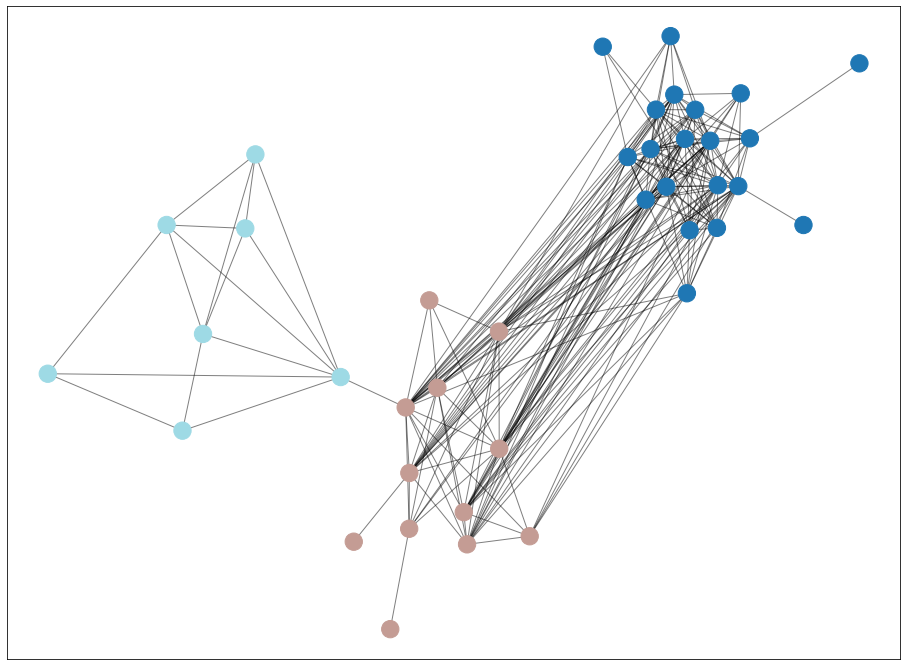

In [20]:
plt.figure(figsize=(16,12))
cmap = cm.get_cmap('tab20', max(partition2.values()) +3)
nx.draw_networkx_nodes(bcgraph3,pos3, partition3.keys(), cmap=cmap, node_color=list(partition3.values()))
nx.draw_networkx_edges(bcgraph3, pos3, alpha=0.5)

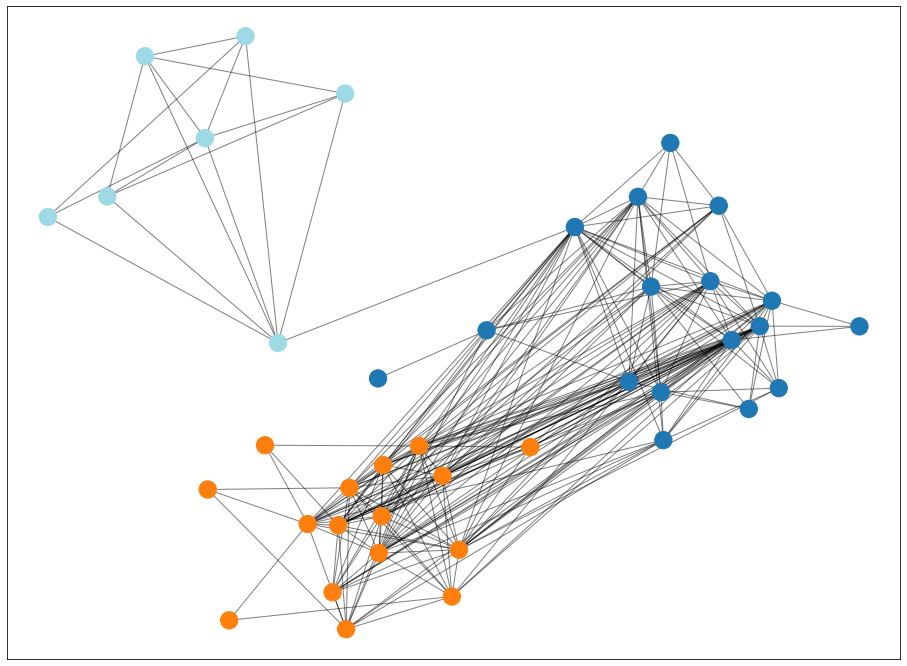

In [79]:
plt.figure(figsize=(16,12))
cmap = cm.get_cmap('tab20', max(partition2.values()) +3)
nx.draw_networkx_nodes(bcgraph3,pos3, partition3.keys(), cmap=cmap, node_color=list(partition3.values()))
nx.draw_networkx_edges(bcgraph3, pos3, alpha=0.5)

In [80]:
sorted(pos3)

['Abhishek et al 2016',
 'Alaei et al 2020',
 'Avinadav et al 2015a',
 'Avinadav et al 2015b',
 'Avinadav et al 2017',
 'Avinadav et al 2019',
 'Avinadav et al 2020',
 'Avinadav et al 2020b',
 'Cai and Lo 2020',
 'Cao et al 2019',
 'Cao et al 2020',
 'Chen et al 2019',
 'Chen et al 2020',
 'Chernonog 2020',
 'Geng et al 2018',
 'Guo et al 2020',
 'He et al 2020',
 'He et al 2021',
 'Li 2020',
 'Li et al 2019',
 'Li et al 2020',
 'Liu et al 2020',
 'Mantin et al 2014',
 'Qin et al 2020',
 'Qin et al 2020b',
 'Ryan et al 2012',
 'Shen et al 2019',
 'Shen et al 2019b',
 'Shen et al 2020',
 'Tian et al 2018',
 'Wang et al 2019',
 'Xu et al 2020',
 'Yan et al 2018',
 'Yan et al 2019',
 'Yenipazarli 2020',
 'Zennyo 2020',
 'Zhang and Zhang 2019',
 'Zhang and Zhang 2020',
 'Zhen et al 2020',
 'de Matta et al 2017']

In [81]:
max(partition1.values())

2

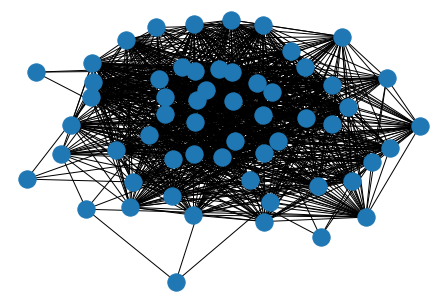

In [82]:
nx.draw_kamada_kawai(bcgraph)

In [83]:
import numpy as np

In [84]:
xy = np.vstack(pos3.values())
xy.min(axis=0), xy.max(axis=0)

/home/siegman/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """Entry point for launching an IPython kernel.


(array([-0.65306862, -0.39905314]), array([1.02800778, 1.        ]))

In [85]:
import json

In [86]:
json.dumps(partition3)

'{"Cao et al 2020": 0, "Chen et al 2020": 0, "Li et al 2019": 1, "Chen et al 2019": 1, "Wang et al 2019": 0, "Cao et al 2019": 0, "Zhen et al 2020": 0, "Avinadav et al 2015a": 8, "Mantin et al 2014": 0, "Shen et al 2019": 0, "Qin et al 2020": 1, "Avinadav et al 2017": 8, "Zennyo 2020": 1, "He et al 2020": 1, "Li 2020": 1, "Avinadav et al 2019": 8, "Avinadav et al 2015b": 8, "Yenipazarli 2020": 0, "Tian et al 2018": 0, "Cai and Lo 2020": 1, "Chernonog 2020": 8, "Ryan et al 2012": 0, "Avinadav et al 2020b": 8, "Alaei et al 2020": 1, "Xu et al 2020": 1, "de Matta et al 2017": 0, "Zhang and Zhang 2019": 0, "Qin et al 2020b": 1, "Shen et al 2019b": 0, "Li et al 2020": 1, "Guo et al 2020": 1, "Zhang and Zhang 2020": 0, "He et al 2021": 1, "Liu et al 2020": 1, "Avinadav et al 2020": 8, "Shen et al 2020": 1, "Yan et al 2019": 0, "Yan et al 2018": 0, "Geng et al 2018": 1, "Abhishek et al 2016": 0}'

In [87]:
inv_part = {}
for node in bcgraph2.nodes():
    cluster3 = partition3.get(node,-1)
    inv_part[cluster3] = inv_part.get(cluster3,[])+[node]

inv_part

{0: ['Cao et al 2020',
  'Chen et al 2020',
  'Wang et al 2019',
  'Cao et al 2019',
  'Zhen et al 2020',
  'Mantin et al 2014',
  'Shen et al 2019',
  'Yenipazarli 2020',
  'Tian et al 2018',
  'Ryan et al 2012',
  'de Matta et al 2017',
  'Zhang and Zhang 2019',
  'Shen et al 2019b',
  'Zhang and Zhang 2020',
  'Yan et al 2019',
  'Yan et al 2018',
  'Abhishek et al 2016'],
 1: ['Li et al 2019',
  'Chen et al 2019',
  'Qin et al 2020',
  'Zennyo 2020',
  'He et al 2020',
  'Li 2020',
  'Cai and Lo 2020',
  'Alaei et al 2020',
  'Xu et al 2020',
  'Qin et al 2020b',
  'Li et al 2020',
  'Guo et al 2020',
  'He et al 2021',
  'Liu et al 2020',
  'Shen et al 2020',
  'Geng et al 2018'],
 -1: ['De Giovanni 2020',
  'Sun et al 2020',
  'Hagiu and Wright 2020',
  'Xu et al 2018',
  'Jiang et al 2017',
  'Hua et al 2020',
  'Li et al 2016',
  'Grieger 2003',
  'Lin et al 2020',
  'Renna 2010',
  'Schlosser and Boissier 2018',
  'Zhou et al 2019',
  'Yu and Zhang 2017',
  'Wang et al 2020',


inv_part = {}
for k, v in partition3.items():
    inv_part[v] = inv_part.get(v,[])+[k]

for u in 
if partit2_sizes[partition2[u]] <= 2

In [88]:
article_order = sum((sorted(inv_part[k]) for k in [0,1,8,-1]),[])

adj_df= pd.DataFrame(index=article_order, 
        columns=pd.MultiIndex.from_tuples([(partition3.get(node,-1),node) for node in article_order]))

for source, dest_dict in bcgraph.adjacency():
    for dest_name, data in dest_dict.items():
        same_cluster = source in partition3 \
            and dest_name in partition3 \
            and partition3[source] == partition3[dest_name]
        adj_df.loc[source,(partition3.get(dest_name,-1),dest_name)]= data['weight'] * {True: 1, False: -1}[same_cluster]
    
   


In [89]:
adj_df

0                                \
                            Abhishek et al 2016 Cao et al 2019 Cao et al 2020   
Abhishek et al 2016                         NaN              2              2   
Cao et al 2019                                2            NaN              2   
Cao et al 2020                                2              2            NaN   
Chen et al 2020                               4              6              5   
Mantin et al 2014                             2              5              1   
Ryan et al 2012                               1              2              3   
Shen et al 2019                               8              4              4   
Shen et al 2019b                              8              4              4   
Tian et al 2018                               8              3              4   
Wang et al 2019                               3              4              5   
Yan et al 2018                               14              7              4   
Yan et al 2019                                6              7              2   
Yenipazarli 2020                              4              4              4   
Zhang and Zhang 2019                          4              5              5   
Zhang and Zhang 2020                          3              1              2   
Zhen et al 2020                               2              3              4   
de Matta et al 2017                           5              1              1   
Alaei et al 2020                             -3             -4             -3   
Cai and Lo 2020                              -1             -2             -4   
Chen et al 2019                              -3             -5             -1   
Geng et al 2018                              -1             -1             -1   
Guo et al 2020                               -1             -2             -1   
He et al 2020                                -2             -5             -1   
He et al 2021                                -1             -2             -4   
Li 2020                                      -3             -4            NaN   
Li et al 2019                                -5             -4             -4   
Li et al 2020                               NaN             -4             -1   
Liu et al 2020                               -4             -6             -1   
Qin et al 2020                               -4             -5             -2   
Qin et al 2020b                              -4             -5             -1   
Shen et al 2020                             NaN             -2             -1   
Xu et al 2020                                -1             -3             -4   
Zennyo 2020                                  -5             -3             -1   
Avinadav et al 2015a                        NaN            NaN            NaN   
Avinadav et al 2015b                        NaN             -1             -1   
Avinadav et al 2017                         NaN             -1             -1   
Avinadav et al 2019                         NaN            NaN            NaN   
Avinadav et al 2020                          -1             -3             -4   
Avinadav et al 2020b                        NaN             -1             -1   
Chernonog 2020                              NaN            NaN             -1   
Choi et al 2004                             NaN             -1             -3   
De Giovanni 2020                            NaN            NaN            NaN   
Grieger 2003                                NaN             -1             -1   
Hagiu and Wright 2020                       NaN             -2             -1   
Hua et al 2020                              NaN             -2             -1   
Jiang et al 2017                            NaN             -3             -3   
Li et al 2016                               NaN            NaN            NaN   
Lin et al 2020                              NaN             -1            NaN

In [90]:
#adj_df.to_excel('clustering_analysis_feb.xlsx', index_label='Article')

In [91]:
list(bcgraph3.adjacency())

[('Cao et al 2020',
  {'Chen et al 2020': {'id': 1000, 'weight': 5},
   'Wang et al 2019': {'id': 1003, 'weight': 5},
   'Zhang and Zhang 2019': {'id': 1031, 'weight': 5}}),
 ('Chen et al 2020',
  {'Cao et al 2020': {'id': 1000, 'weight': 5},
   'Li et al 2019': {'id': 1048, 'weight': 8},
   'Chen et al 2019': {'id': 1049, 'weight': 8},
   'Wang et al 2019': {'id': 1050, 'weight': 14},
   'Cao et al 2019': {'id': 1051, 'weight': 6},
   'Zhen et al 2020': {'id': 1054, 'weight': 7},
   'Shen et al 2019': {'id': 1059, 'weight': 8},
   'Qin et al 2020': {'id': 1061, 'weight': 10},
   'Zennyo 2020': {'id': 1063, 'weight': 8},
   'He et al 2020': {'id': 1064, 'weight': 6},
   'Li 2020': {'id': 1066, 'weight': 5},
   'Yenipazarli 2020': {'id': 1069, 'weight': 9},
   'Tian et al 2018': {'id': 1070, 'weight': 7},
   'Ryan et al 2012': {'id': 1072, 'weight': 5},
   'Alaei et al 2020': {'id': 1077, 'weight': 12},
   'Xu et al 2020': {'id': 1078, 'weight': 8},
   'Zhang and Zhang 2019': {'id': 108

In [92]:
list(bcgraph2.nodes())

['Cao et al 2020',
 'Chen et al 2020',
 'Li et al 2019',
 'De Giovanni 2020',
 'Chen et al 2019',
 'Wang et al 2019',
 'Cao et al 2019',
 'Sun et al 2020',
 'Hagiu and Wright 2020',
 'Xu et al 2018',
 'Zhen et al 2020',
 'Jiang et al 2017',
 'Avinadav et al 2015a',
 'Mantin et al 2014',
 'Hua et al 2020',
 'Li et al 2016',
 'Grieger 2003',
 'Shen et al 2019',
 'Lin et al 2020',
 'Qin et al 2020',
 'Avinadav et al 2017',
 'Renna 2010',
 'Zennyo 2020',
 'He et al 2020',
 'Schlosser and Boissier 2018',
 'Li 2020',
 'Avinadav et al 2019',
 'Avinadav et al 2015b',
 'Yenipazarli 2020',
 'Tian et al 2018',
 'Cai and Lo 2020',
 'Chernonog 2020',
 'Ryan et al 2012',
 'Zhou et al 2019',
 'Avinadav et al 2020b',
 'Yu and Zhang 2017',
 'Wang et al 2020',
 'Choi et al 2004',
 'Alaei et al 2020',
 'Xu et al 2020',
 'de Matta et al 2017',
 'Zhang and Zhang 2019',
 'Lu et al 2018',
 'Qin et al 2020b',
 'Shen et al 2019b',
 'Li et al 2020',
 'Guo et al 2020',
 'Zhang and Zhang 2020',
 'He et al 2021',


In [93]:
b3_refs.__repr__()[:200]

"{'Cao et al 2020': [{'author': 'Abdulla, H and Ketzenberg, M and Abbey, J', 'title': 'Taking stock of consumer returns: a review and classification of the literature', 'journal': 'Journal of Operation"

In [94]:
[v['nickname'] for v in b3_refs['Sun et al 2020']]

['abadie2016matching',
 'acimovic2015making',
 'agatz2008efulfillment',
 'akaike1992information',
 'alishah2015inventory',
 'armitage2008statistical',
 'athey2015machine',
 'athey2016solving',
 'baker1978generalised',
 'breiman2001random',
 '__missing__',
 'cadbury1975._may_1975when',
 'chen2016xgboost',
 'cortes1995supportvector',
 'coxe2013generalized',
 'dehejia1999causal',
 'dehejia2002propensity',
 'dhurandhar2014efficient',
 'fang2018uplift',
 'greifer2019covariate',
 'gu1993comparison',
 'gümüş2013shipping',
 'gutierrez2017causal',
 'hansen2004full',
 'harvey1976estimating',
 'he2017spatial',
 'ho2013matchit',
 'ho2017om',
 'holland1983lords',
 'jasin2015lpbased',
 'lai2018fulfilled',
 'lai1978strong',
 'lei2018joint',
 'leng2010joint',
 'lim2015consignment',
 'lo2002true',
 'mahar2009value',
 '__missing__',
 'ming2004substantial',
 '__missing__',
 'nijmeijer2018linear',
 'park1966estimation',
 'rosenbaum2002overt',
 'rosenbaum1983central',
 'rubin1974estimating',
 'sauppe2017ro

In [95]:
bcgraph['Sun et al 2020']

AtlasView({'Cao et al 2020': {'id': 1005, 'weight': 1}, 'Chen et al 2020': {'id': 1052, 'weight': 1}, 'Li et al 2019': {'id': 1100, 'weight': 2}, 'Cao et al 2019': {'id': 1217, 'weight': 1}, 'Hagiu and Wright 2020': {'id': 1261, 'weight': 1}, 'Xu et al 2018': {'id': 1262, 'weight': 1}, 'Jiang et al 2017': {'id': 1263, 'weight': 1}, 'Mantin et al 2014': {'id': 1264, 'weight': 1}, 'Hua et al 2020': {'id': 1265, 'weight': 1}, 'Grieger 2003': {'id': 1266, 'weight': 1}, 'Shen et al 2019': {'id': 1267, 'weight': 1}, 'Qin et al 2020': {'id': 1268, 'weight': 2}, 'Avinadav et al 2017': {'id': 1269, 'weight': 1}, 'Zennyo 2020': {'id': 1270, 'weight': 1}, 'He et al 2020': {'id': 1271, 'weight': 3}, 'Schlosser and Boissier 2018': {'id': 1272, 'weight': 2}, 'Avinadav et al 2015b': {'id': 1273, 'weight': 1}, 'Yenipazarli 2020': {'id': 1274, 'weight': 1}, 'Tian et al 2018': {'id': 1275, 'weight': 1}, 'Cai and Lo 2020': {'id': 1276, 'weight': 1}, 'Ryan et al 2012': {'id': 1277, 'weight': 1}, 'Zhou et 

In [96]:
bcgraph2['Sun et al 2020']

AtlasView({})

In [97]:
bcgraph2['asdfsd']

KeyError: 'asdfsd'

30 0


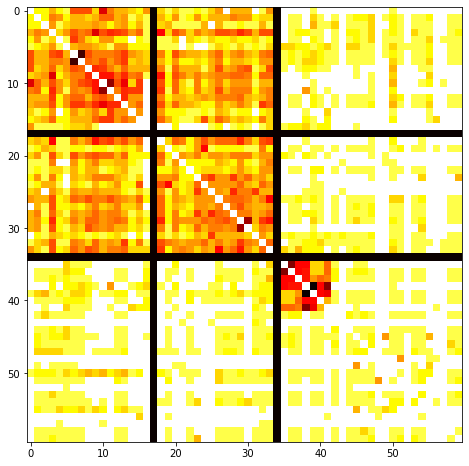

In [101]:
img = np.abs(adj_df.fillna(0).values)
img1 = 30*np.ones((60,60))
indmap = np.arange(58)
indmap[17:] = indmap[17:]+1
indmap[33:] = indmap[33:]+1
for i in range(58):
     img1[indmap[i],indmap] = img[i,:]
print(img.max(),img.min())              
plt.figure(figsize=(8,8))
plt.imshow(np.sqrt(img1),cmap='hot_r')

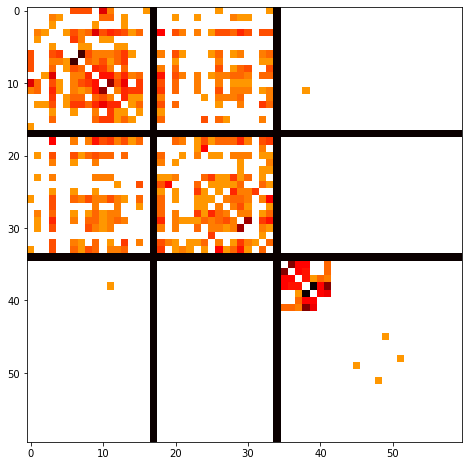

In [102]:
img1 *= img1 >=5
plt.figure(figsize=(8,8))
plt.imshow(np.sqrt(img1),cmap='hot_r')

In [103]:
adj_df[1].shape

(58, 16)

In [104]:
np.abs(adj_df.values)

array([[nan, 2, 2, ..., nan, nan, nan],
       [2, nan, 2, ..., nan, 1, 1],
       [2, 2, nan, ..., nan, 1, 1],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, 1, 1, ..., nan, nan, 1],
       [nan, 1, 1, ..., nan, 1, nan]], dtype=object)

In [105]:
len(bcgraph.nodes()), len(bcgraph2.nodes())

(58, 58)

### look at whether the original partition could have also looked this good

In [106]:

Counter(partition.values())
part1_order = sorted(partition.items(), key= lambda x: (x[1],x[0]))
part1_order_names = [x[0] for x in part1_order]
part1_order 

[('Avinadav et al 2015a', 0),
 ('Avinadav et al 2015b', 0),
 ('Avinadav et al 2017', 0),
 ('Avinadav et al 2019', 0),
 ('Avinadav et al 2020', 0),
 ('Avinadav et al 2020b', 0),
 ('Chernonog 2020', 0),
 ('de Matta et al 2017', 0),
 ('Cao et al 2019', 1),
 ('Cao et al 2020', 1),
 ('Choi et al 2004', 1),
 ('Grieger 2003', 1),
 ('Hagiu and Wright 2020', 1),
 ('Hua et al 2020', 1),
 ('Jiang et al 2017', 1),
 ('Li et al 2016', 1),
 ('Lin et al 2020', 1),
 ('Lu et al 2018', 1),
 ('Luo et al 2020', 1),
 ('Mantin et al 2014', 1),
 ('Renna 2010', 1),
 ('Ryan et al 2012', 1),
 ('Schlosser and Boissier 2018', 1),
 ('Shen et al 2019', 1),
 ('Shen et al 2019b', 1),
 ('Sun et al 2020', 1),
 ('Wang et al 2020', 1),
 ('Yu and Zhang 2017', 1),
 ('Zhao and Bisi 2010', 1),
 ('Zhou et al 2019', 1),
 ('Abhishek et al 2016', 2),
 ('Alaei et al 2020', 2),
 ('Cai and Lo 2020', 2),
 ('Chen et al 2019', 2),
 ('Chen et al 2020', 2),
 ('De Giovanni 2020', 2),
 ('Geng et al 2018', 2),
 ('Guo et al 2020', 2),
 ('He 

In [107]:
adj_df1 = pd.DataFrame()
for key, column in adj_df.items():
    adj_df1[key[1]] = column

adj_df1 = adj_df1[part1_order_names].loc[part1_order_names,:]
adj_df1

,Avinadav et al 2015a,Avinadav et al 2015b,Avinadav et al 2017,Avinadav et al 2019,Avinadav et al 2020,Avinadav et al 2020b,Chernonog 2020,de Matta et al 2017,Cao et al 2019,Cao et al 2020,...,Wang et al 2019,Xu et al 2018,Xu et al 2020,Yan et al 2018,Yan et al 2019,Yenipazarli 2020,Zennyo 2020,Zhang and Zhang 2019,Zhang and Zhang 2020,Zhen et al 2020
Avinadav et al 2015a,NaN,20,12,12,3,3,7,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-3,NaN,NaN,NaN
Avinadav et al 2015b,20,NaN,12,11,3,3,7,-2,-1,-1,...,NaN,NaN,-1,NaN,NaN,-1,-1,-1,NaN,NaN
Avinadav et al 2017,12,12,NaN,11,5,7,6,-2,-1,-1,...,NaN,NaN,-1,NaN,NaN,-1,-4,-1,NaN,NaN
Avinadav et al 2019,12,11,11,NaN,30,12,20,-3,NaN,NaN,...,-1,NaN,-2,NaN,-5,NaN,-2,NaN,-1,-2
Avinadav et al 2020,3,3,5,30,NaN,12,13,-1,-3,-4,...,NaN,NaN,-2,-1,-1,-2,-2,-2,NaN,-1
Avinadav et al 2020b,3,3,7,12,12,NaN,4,-2,-1,-1,...,NaN,NaN,-3,NaN,NaN,-1,-2,-1,NaN,NaN
Chernonog 2020,7,7,6,20,13,4,NaN,-2,NaN,-1,...,NaN,-1,-1,NaN,-1,NaN,NaN,NaN,-3,-2
de Matta et al 2017,-1,-2,-2,-3,-1,-2,-2,NaN,1,1,...,1,NaN,-1,NaN,NaN,NaN,-3,NaN,NaN,NaN
Cao et al 2019,NaN,-1,-1,NaN,-3,-1,NaN,1,NaN,2,...,4,NaN,-3,7,7,4,-3,5,1,3
Cao et al 2020,NaN,-1,-1,NaN,-4,-1,-1,1,2,NaN,...,5,NaN,-4,4,2,4,-1,5,2,4


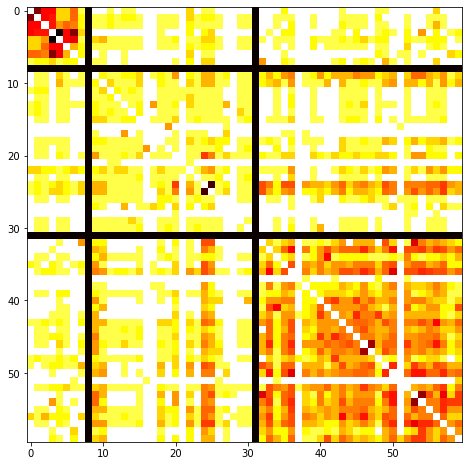

In [117]:
img2 = np.abs(adj_df1.fillna(0).values)
img3 = 30*np.ones((60,60))
indmap = np.arange(58)
indmap[8:] +=1
indmap[30:] +=1
for i in range(58):
    img3[indmap[i],indmap]= img2[i,:]
    
plt.figure(figsize=(8,8))

plt.imshow(np.sqrt(img3),cmap='hot_r')

In [110]:
Counter([x[1] for x in part1_order])

Counter({0: 8, 1: 22, 2: 28})

In [61]:
inv_part0 = {}
for node in bcgraph.nodes():
    cluster = partition.get(node,-1)
    inv_part0[cluster] = inv_part0.get(cluster,[])+[node]

inv_part0

{1: ['Cao et al 2020',
  'Cao et al 2019',
  'Sun et al 2020',
  'Hagiu and Wright 2020',
  'Jiang et al 2017',
  'Mantin et al 2014',
  'Hua et al 2020',
  'Li et al 2016',
  'Grieger 2003',
  'Shen et al 2019',
  'Lin et al 2020',
  'Renna 2010',
  'Schlosser and Boissier 2018',
  'Ryan et al 2012',
  'Zhou et al 2019',
  'Yu and Zhang 2017',
  'Wang et al 2020',
  'Choi et al 2004',
  'Lu et al 2018',
  'Shen et al 2019b',
  'Zhao and Bisi 2010',
  'Luo et al 2020'],
 2: ['Chen et al 2020',
  'Li et al 2019',
  'De Giovanni 2020',
  'Chen et al 2019',
  'Wang et al 2019',
  'Xu et al 2018',
  'Zhen et al 2020',
  'Qin et al 2020',
  'Zennyo 2020',
  'He et al 2020',
  'Li 2020',
  'Yenipazarli 2020',
  'Tian et al 2018',
  'Cai and Lo 2020',
  'Alaei et al 2020',
  'Xu et al 2020',
  'Zhang and Zhang 2019',
  'Qin et al 2020b',
  'Li et al 2020',
  'Guo et al 2020',
  'Zhang and Zhang 2020',
  'He et al 2021',
  'Liu et al 2020',
  'Shen et al 2020',
  'Yan et al 2019',
  'Yan et al

In [118]:
parti_compare={}
for k0, v0 in inv_part0.items():
    parti_compare[k0] = [len(set(v0).intersection(v1)) for v1 in inv_part.values()]

dff = pd.DataFrame(data=parti_compare, index=inv_part.keys())
dff[sorted(dff.columns)]

,0,1,2
0,1,6,10
1,0,0,16
-1,0,16,2
8,7,0,0


In [63]:
len(bcgraph2.nodes)

58

In [64]:
sum(len(v) for v in b3_refs.values())

2887

In [65]:
len(b3_refs)

58